Osnabrück University - Machine Learning (Summer Term 2021) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 10

## Introduction

This week's sheet should be solved and handed in before **2:00pm of Tuesday, June 29, 2021**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (Independence) [2 Points]

This exercise is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** Explain the idea of stochastical independence. What is the intuition and how is it defined?

YOUR ANSWER HERE

**b)** What is pairwaise independence and what is mutual independence? Can you provide an example of variables that are pairwise independent but not mutual independent?

YOUR ANSWER HERE

**c)** What does it mean that variables are i.i.d.? When do we assume i.i.d. variables in machine learning and what are the consequences?

YOUR ANSWER HERE

## Assignment 1: Nearest Neighbor Theory [5 Points]

In this exercise you will examine some aspects of the nearest neighbor algorithm in more detail. Not all questions have been answered in the lecture, so you may refer to literature for a deeper understanding.

### a) The nearest neighbor algorithm

Explain in your own words the nearest neighbor algorithm.  What prerequisites have to be fulfilled to apply the algorithm? To what kind of tasks can it be applied? What additional problem arises when considering multiple nearest neighbors instead of only one?

The k nearest neighbor algorithm calculates the clostest datapoints to the given one while taking their class/ target into consideration for the classification of the given datapoint. For dicrete valued outputs the neighborhodd votes while for real valued outputs the mean of their target is taken. 

### b) Inductive bias

What is the inductive bias of nearest neighbor learning? In what sense is it a local method?

The k nearest neighbour is local in the regard that it only is able to classify datapoints similiar to one another and here forms somewhat of a cluster while disregarding the other datapoints for the classification.

### c) Curse of dimensionality

What problems do you anticipate when applying the nearest neighbor algorithm in high dimensional spaces? How would you mitigate those problems?

As usual the curse of dimensionality leaves a lot of unused spce in teh data representation as the complexity of k nearest neighbour is n x m (the data points times the dimensionality) 

### d) Nearest neighbor search

The lecture slides claim that application of the nearest neighbor approach may be slow (for many stored examples). Explain this statement: what is the complexity?  What methods could be applied to improve the situation?

The k nearest neighbour has to a complexity of O(n*n) as it has to compare each eleemtn with every element in the dataset and calculate the distance to check for the closest ones.

### e) Sensitivity to noise

Why is the nearest neighbor approach sensitive to noise? What is the essential difference to other learning approaches, that are less sensitive to noise? How could the nearest neighbor approach be made less noise sensitive?

K-nearest neighbours is sensitive to noise in the regard that every element in the neighbourhood is equally as important. Therefore one outlier that typically would not be in the neighbourhood changes the classification hypotheses into the negative. Other learning approaches such as k-means have a comparion element with wich similarity is indicated. Nearest neighbor could be made less sensitive to noise by weighting closer neighbours more in terms of importance

## Assignment 2: Nearest Neighbor Application [5 Points]

In this exercise, you will explore the [nearest neighbor implementation](https://scikit-learn.org/stable/modules/neighbors.html) module and some additional functions provided by scikit learn.

### a) Classifying the iris dataset [1 point]

In the first part of this exercise you will work on the famous Iris dataset (you should already know it). In the following cell we prepare the dataset for you: the data set is split into two parts: `(X_train, y_train)` contains the training data and `(X_test, y_test)` contain test data for evaluation (part b).

In [56]:
from sklearn import datasets
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4)

Now use the prepared data to train a [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). Try to create a simple nearest neighbor classifier similar to that used in the lecture ($k=1$, Euclidean metric, no fancy search strategy). Consult the documentation to make sure you understand the different parameters you can pass to this class.

In [57]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors = 1, metric = "euclidean")

### b) Evaluation of the nearest neighbor classifier [2 points]

Explain in the following text cell, how you can assess the performance of your classifier? You may lookup central ideas, like train/test-split and the accuracy score, in the scikit learn documentation. Then evaluate your nearest neighbor classifier in the code cell below (you may use the function [`sklearn.metrics.accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Can you improve the performance by changing parameters of the nearest neighbor classifier?

the performance of the classifier can be seen by its accuracy on the unseen test dataset after fitting the training dataset. If hyperparamtization is done a validation dataset would be of good use. Here the accuracy is pretty good however.

In [58]:
from sklearn.metrics import accuracy_score

neigh.fit(X_train, y_train)
accuracy_score(neigh.predict(X_test),y_test)

0.9666666666666667

### c) MNIST classification [2 points]

In this last part of the exercise we use a new dataset: The MNIST database of handwritten numbers. MNIST consists of 70.0000 handwritten digits, 7.000 for each of the classes 0 to 9. It is nowadays used as a demo dataset, as it is no longer a real challenge for state-of-the-art machine learning algorithms (reaching up to 99.9% accuracy). Still it has many interesting features and can help to compare and study different algorithms. In the following cell, we load the dataset for you:

In [126]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state

# do not use full dataset (to keep runtime low)
train_samples = 5000
test_samples = 1000

# Download data from https://www.openml.org/d/554 (needs some time ...)
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=test_samples)

def random_sample(X, size=None):
    """Obtain a sample of given size from the dataset `X`.
    """
    return X[np.random.choice(X.shape[0], size=size)]

def show_sample(*args, titles=None):
    """Display one or multiple MNIST samples, with optional `titles`.
    """
    plt.figure(figsize=(4*len(args), 4))
    plt.gray()
    for i, X in enumerate(args):
        plt.subplot(1, len(args), i+1)
        plt.imshow(X.reshape(28,28))
        if titles is not None:
            plt.title(titles[i])
    plt.show()

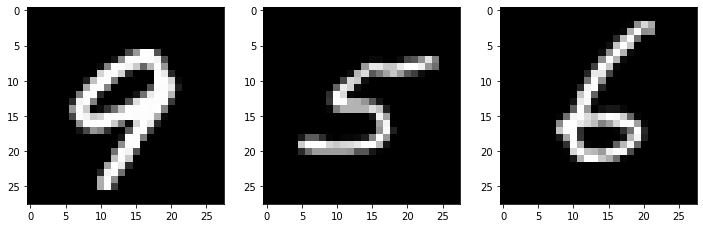

In [39]:
# Run this cell to see some random examples from the dataset
show_sample(*random_sample(X_test, size=3))

Now it's your task: train a nearest neighbor classifier on the MNIST dataset. Visualize the k nearest neighbors.

<IPython.core.display.Javascript object>


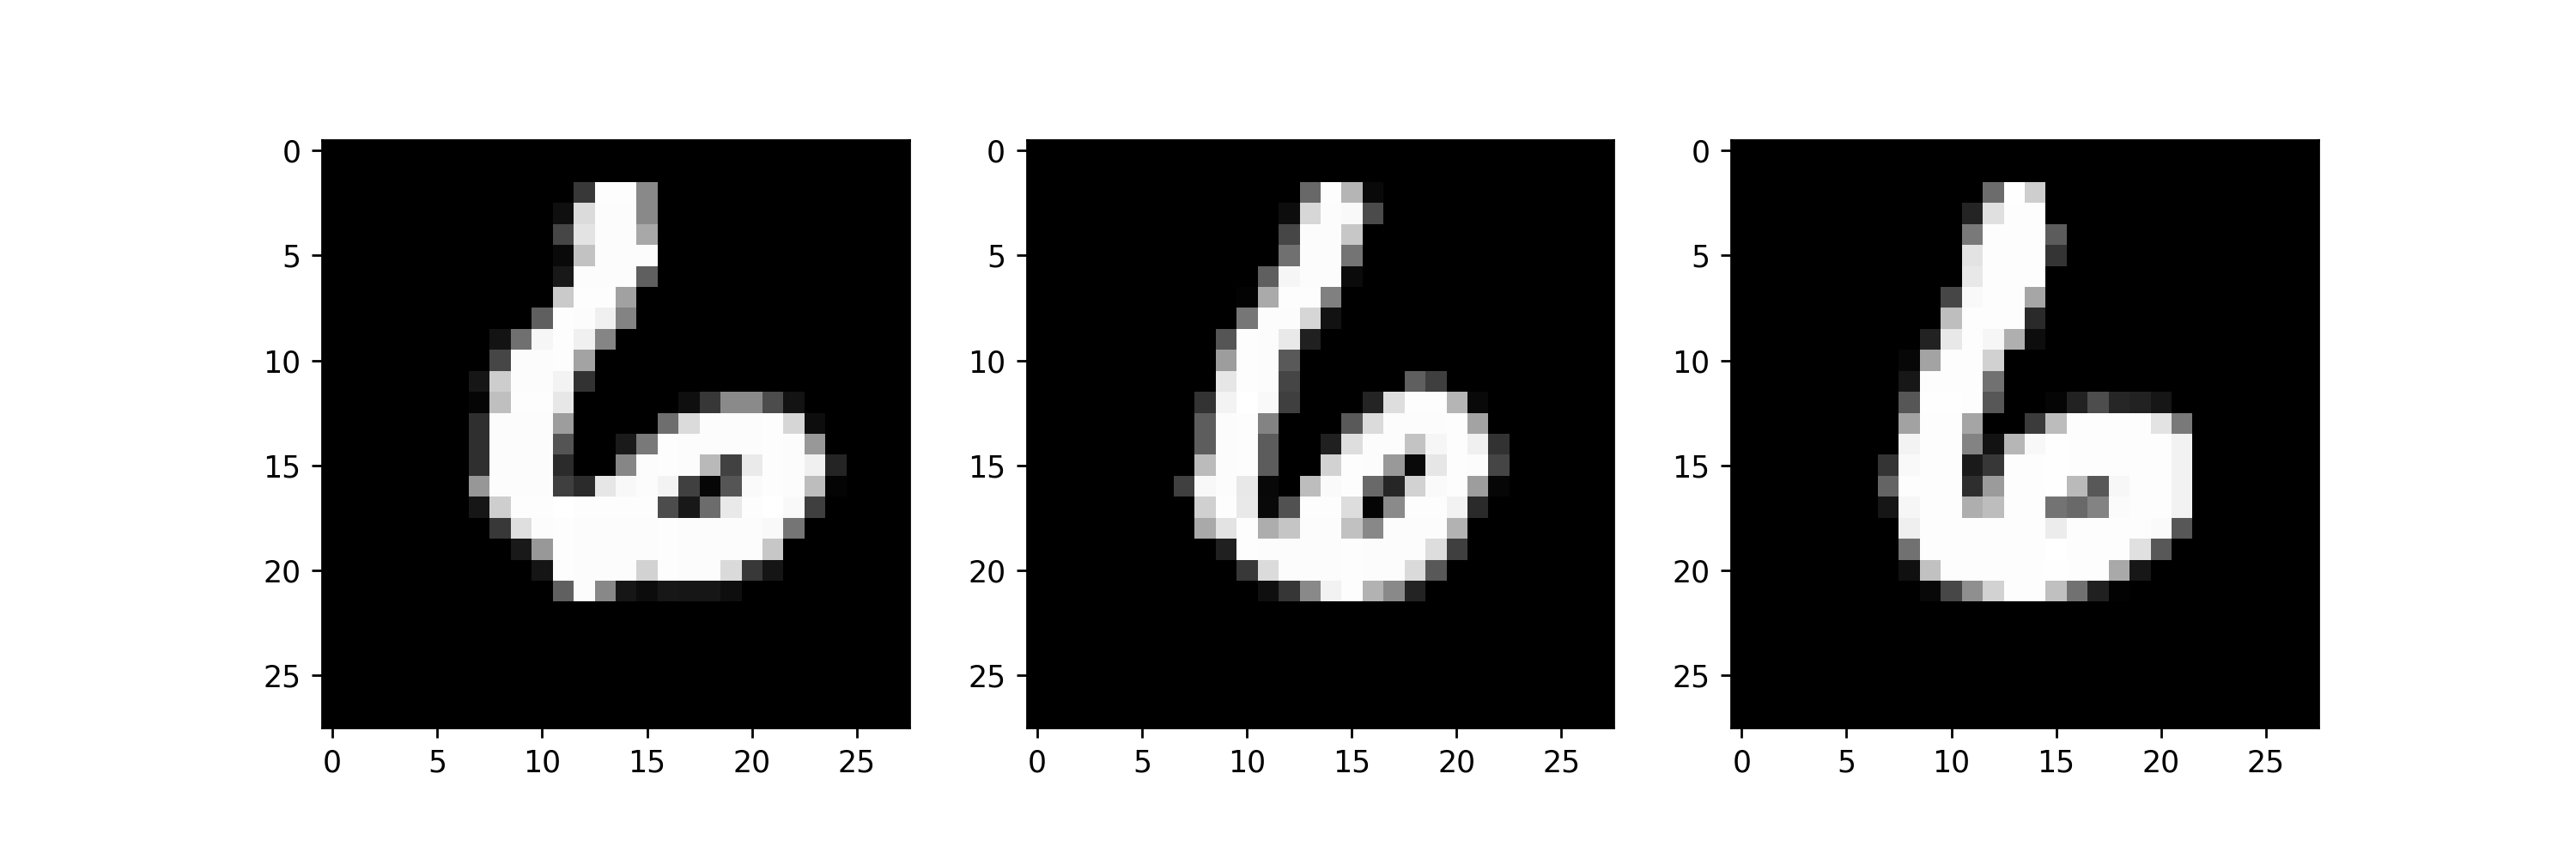

<IPython.core.display.Javascript object>


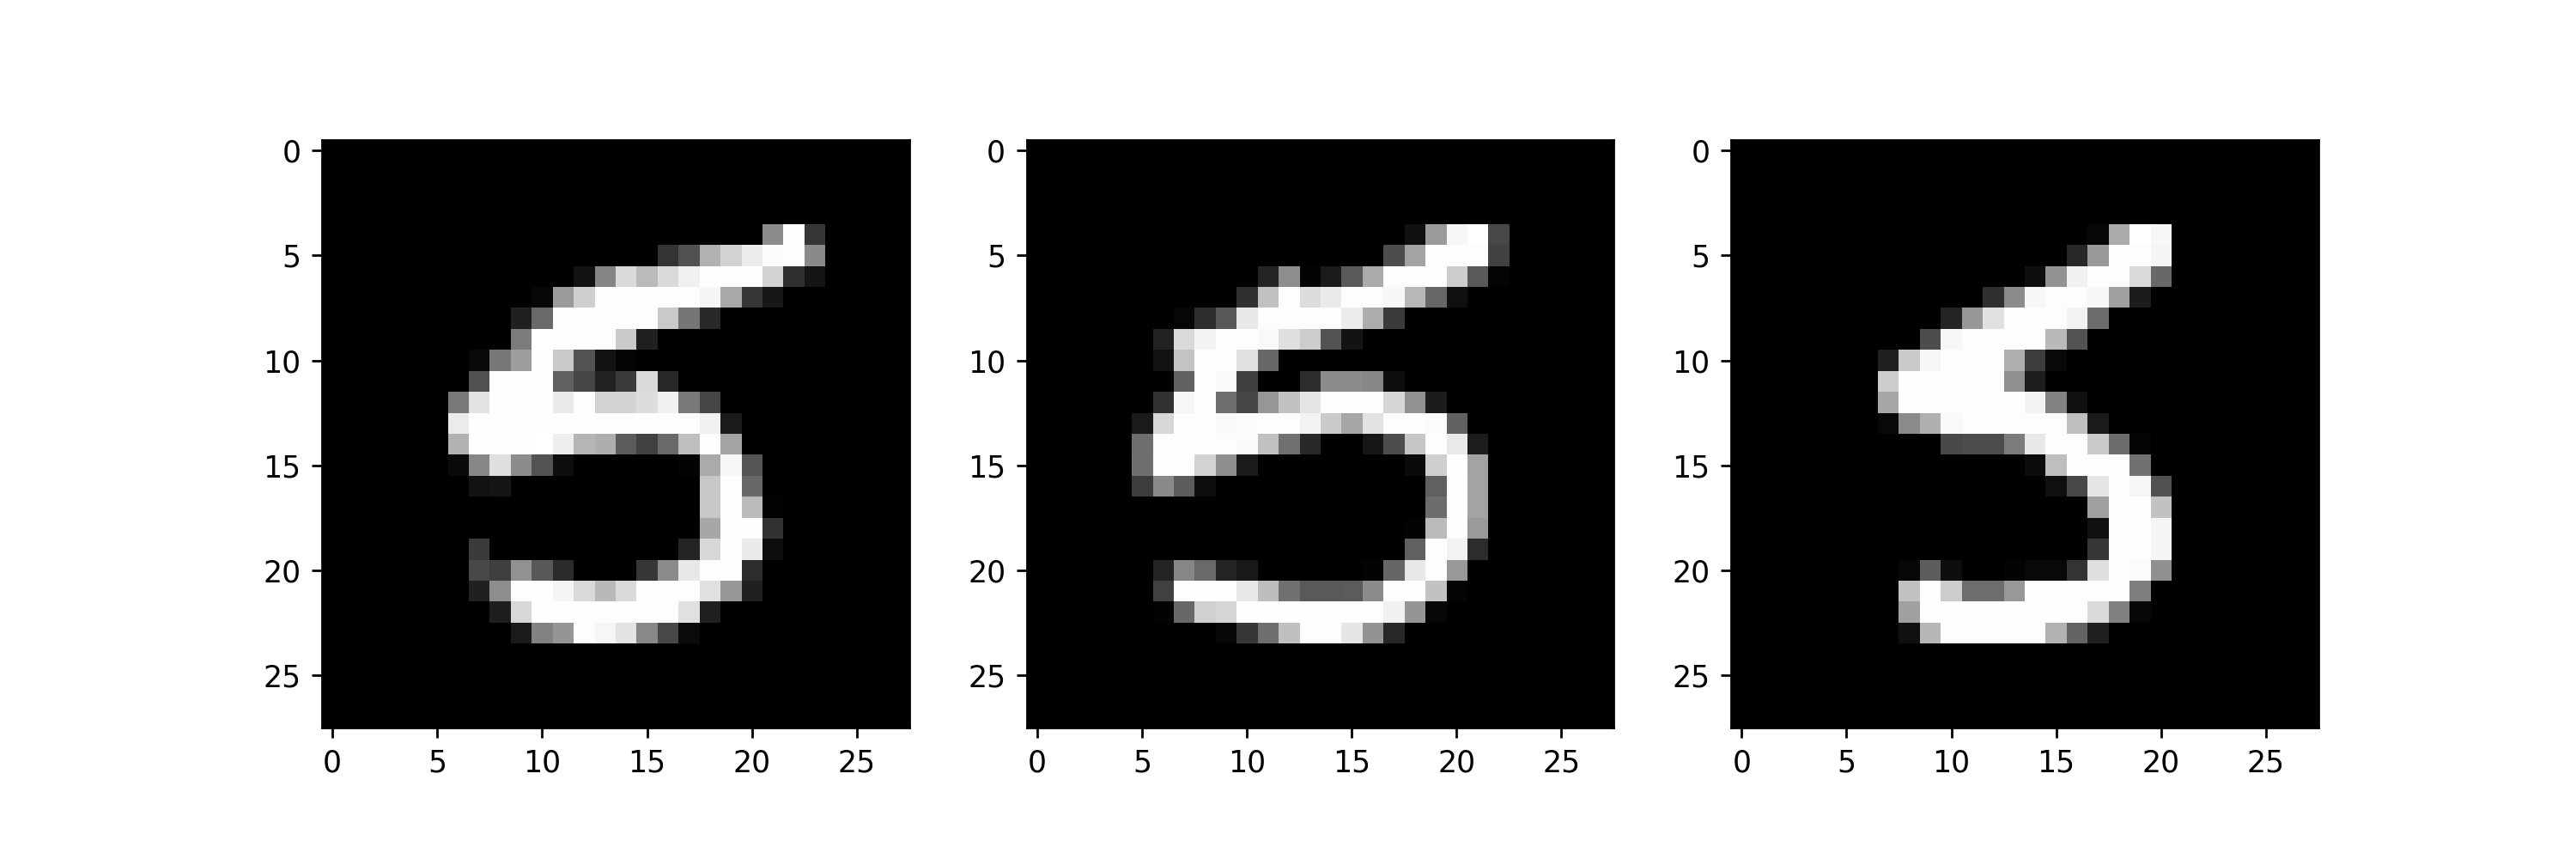

<IPython.core.display.Javascript object>


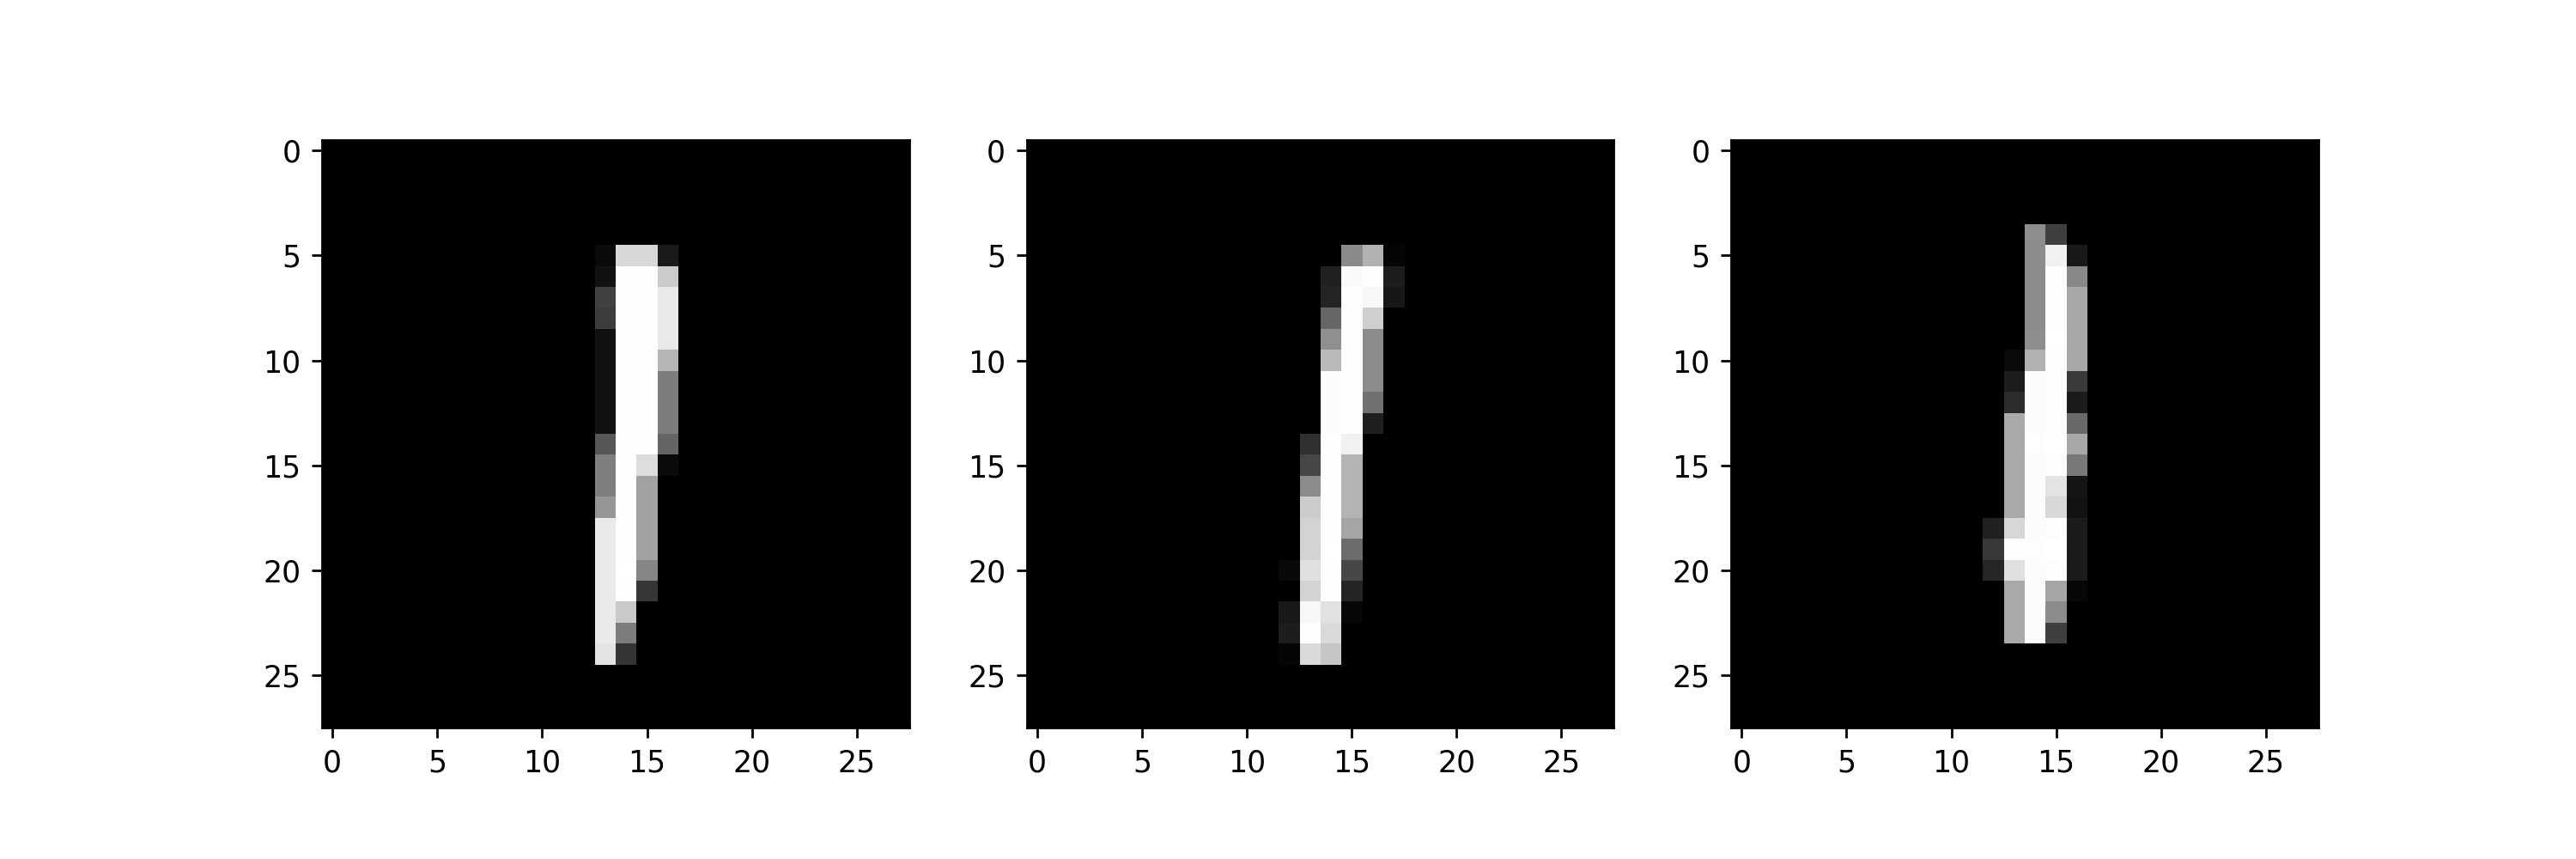

<IPython.core.display.Javascript object>


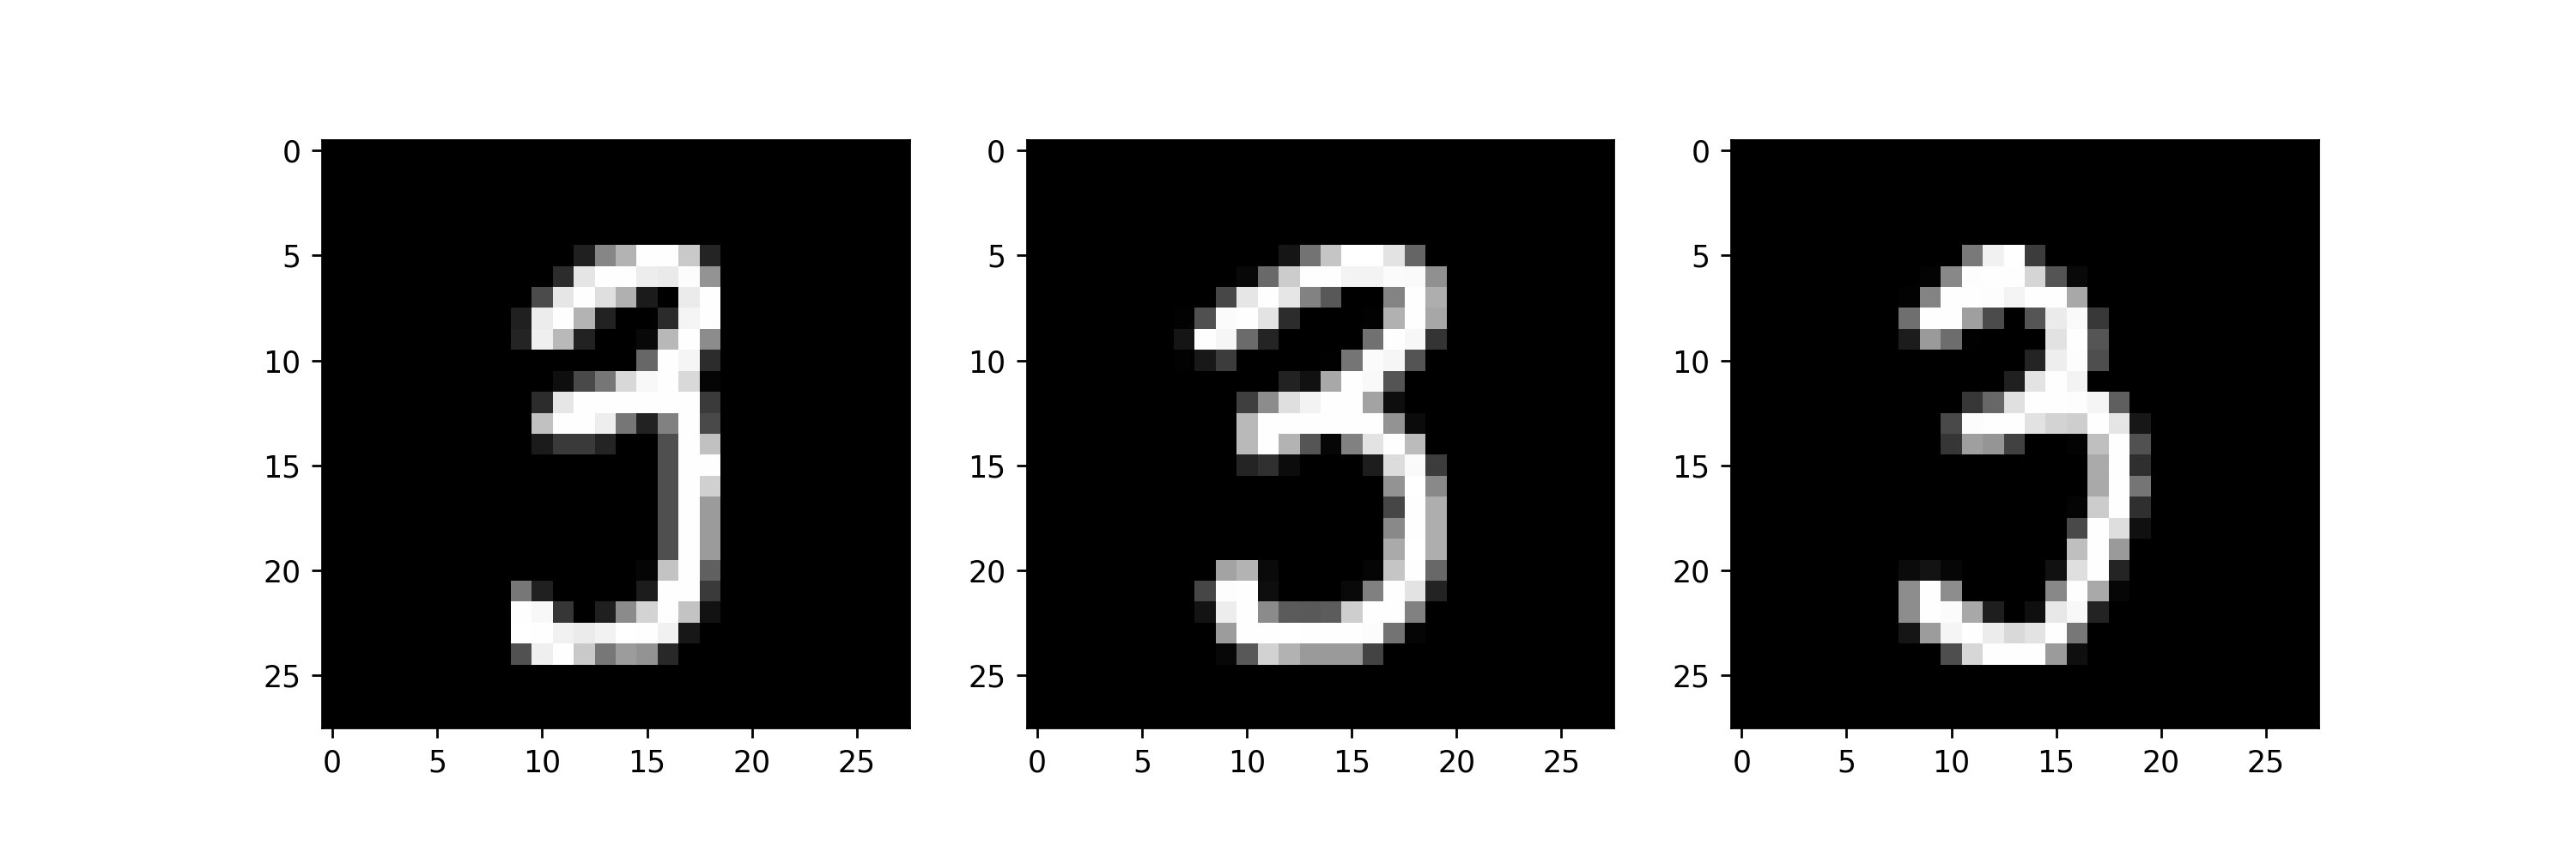

<IPython.core.display.Javascript object>


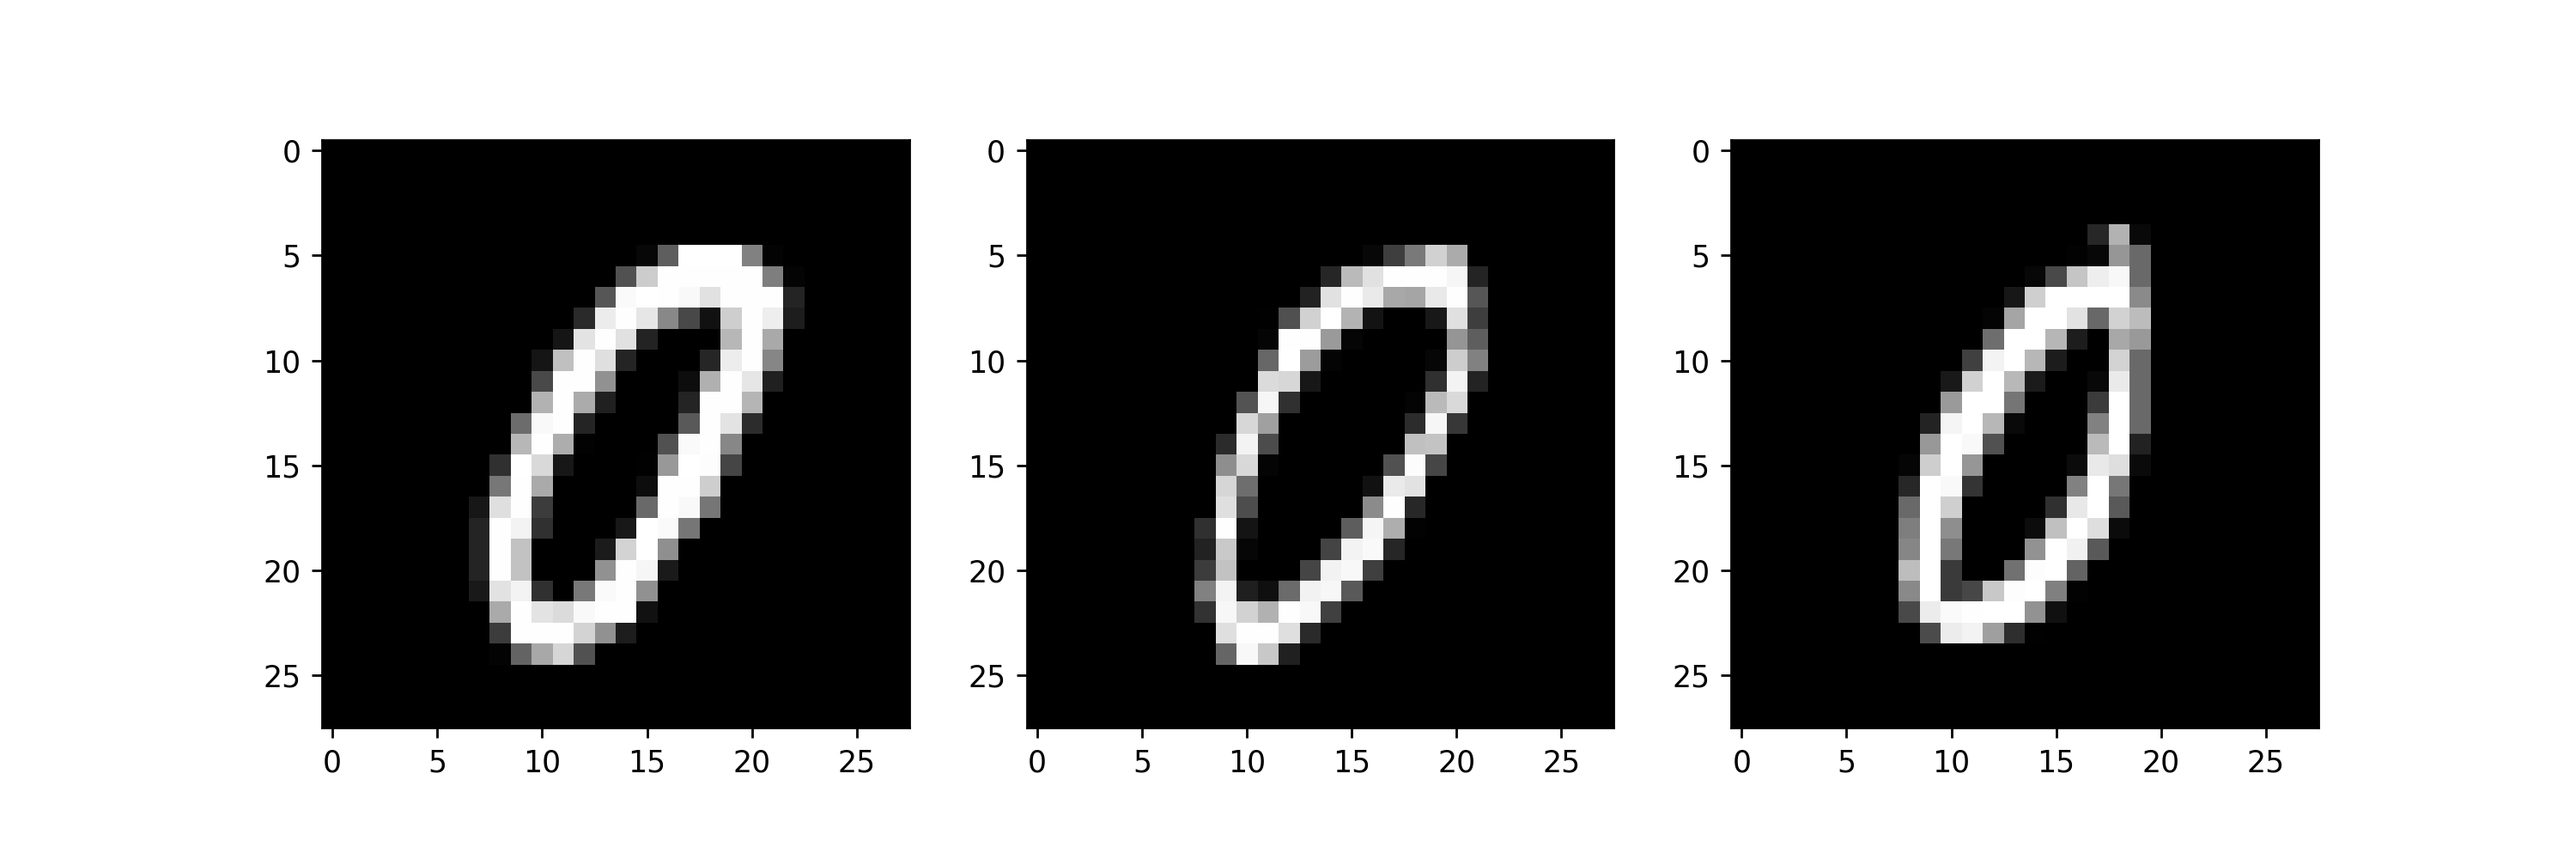

<IPython.core.display.Javascript object>


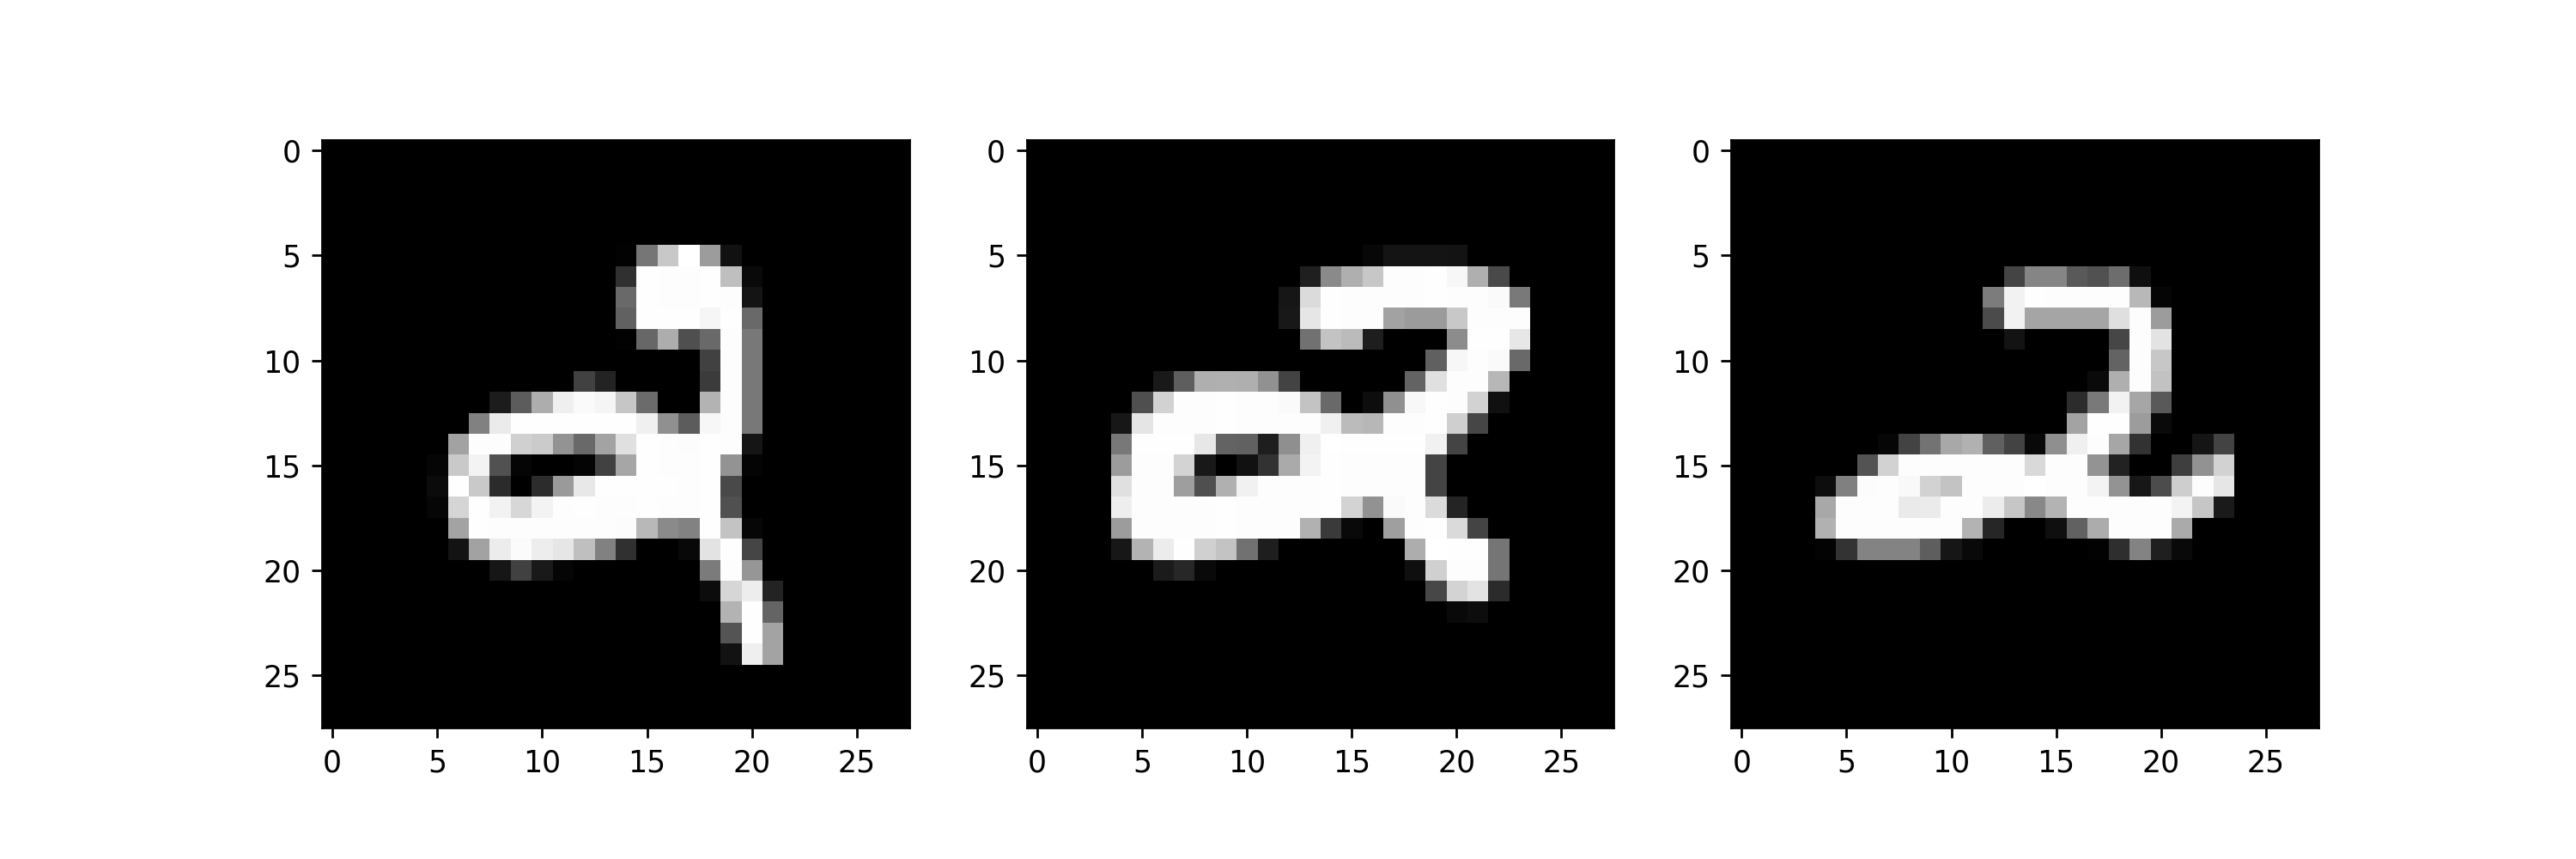

<IPython.core.display.Javascript object>


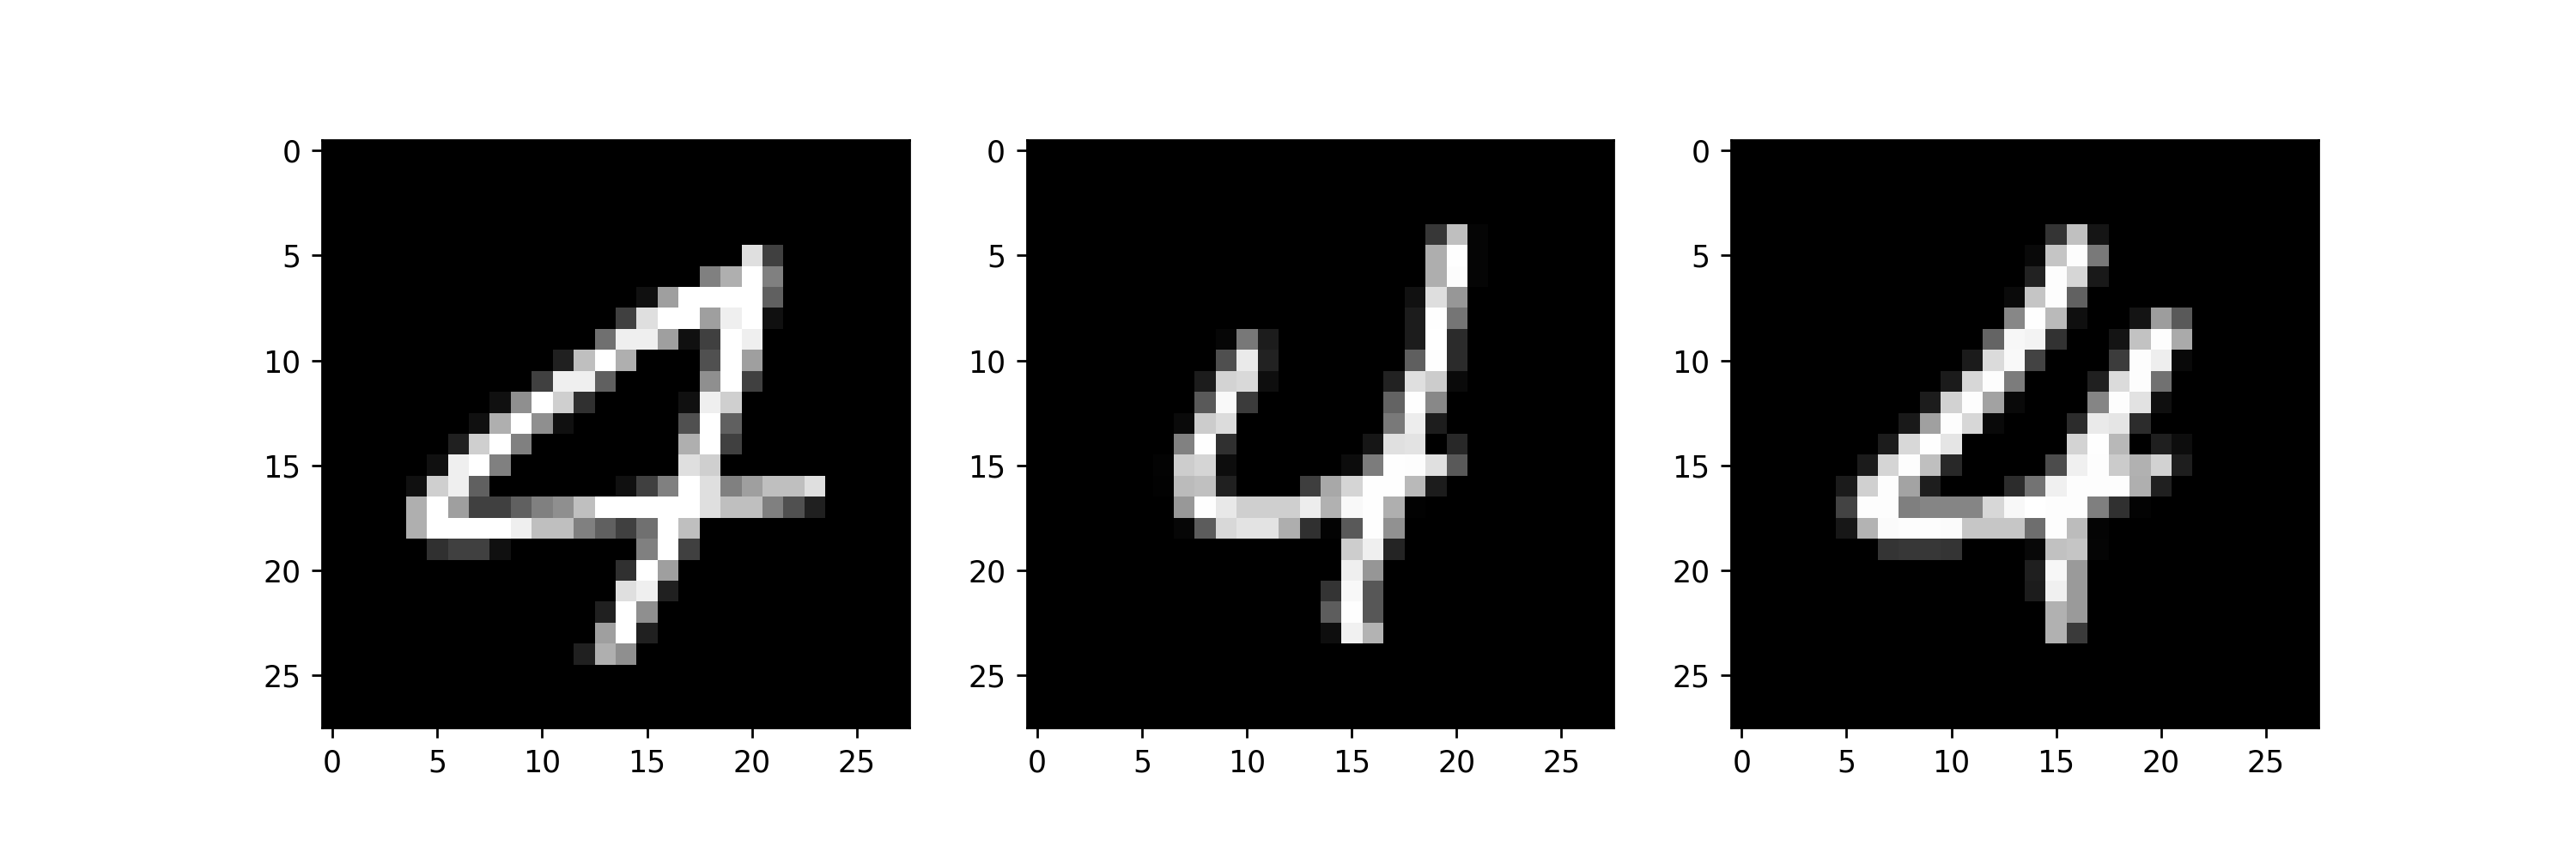

<IPython.core.display.Javascript object>


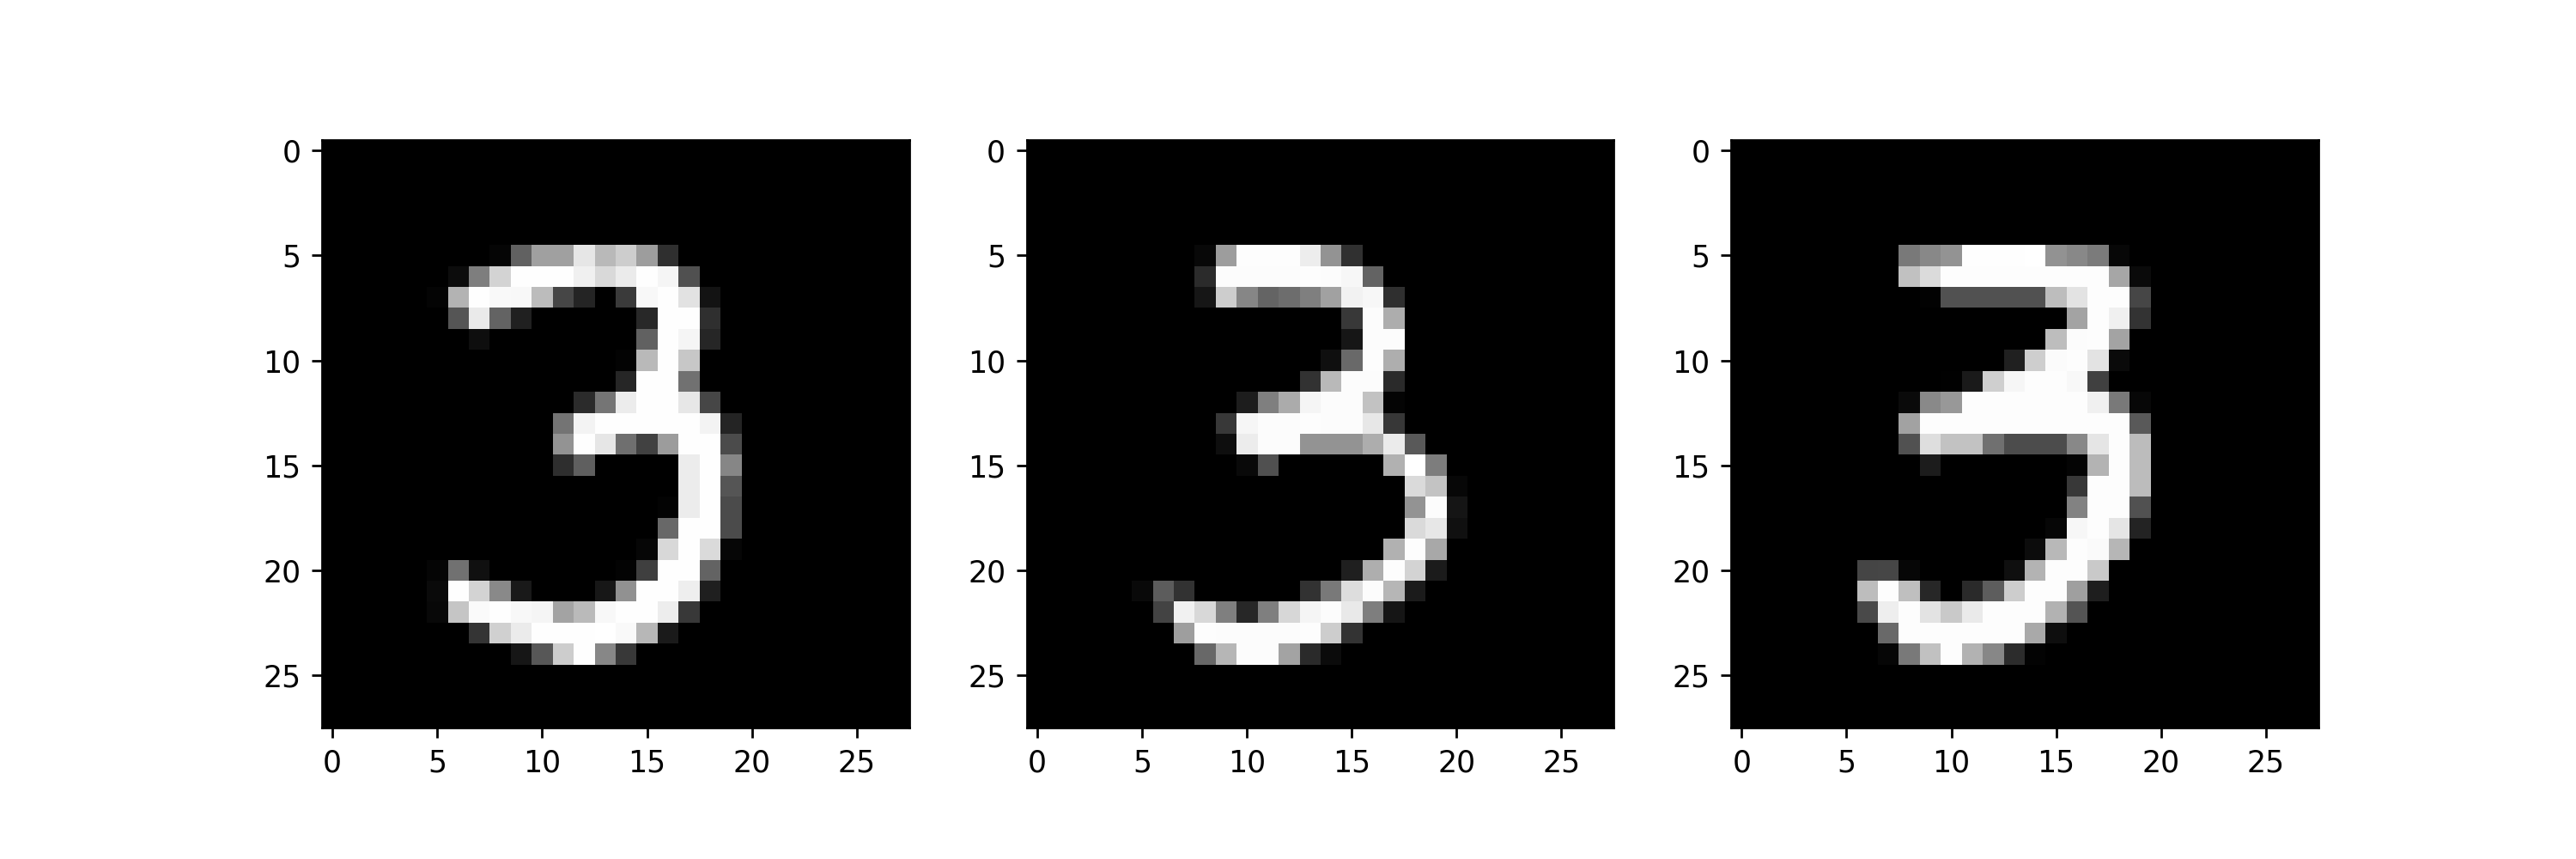

<IPython.core.display.Javascript object>


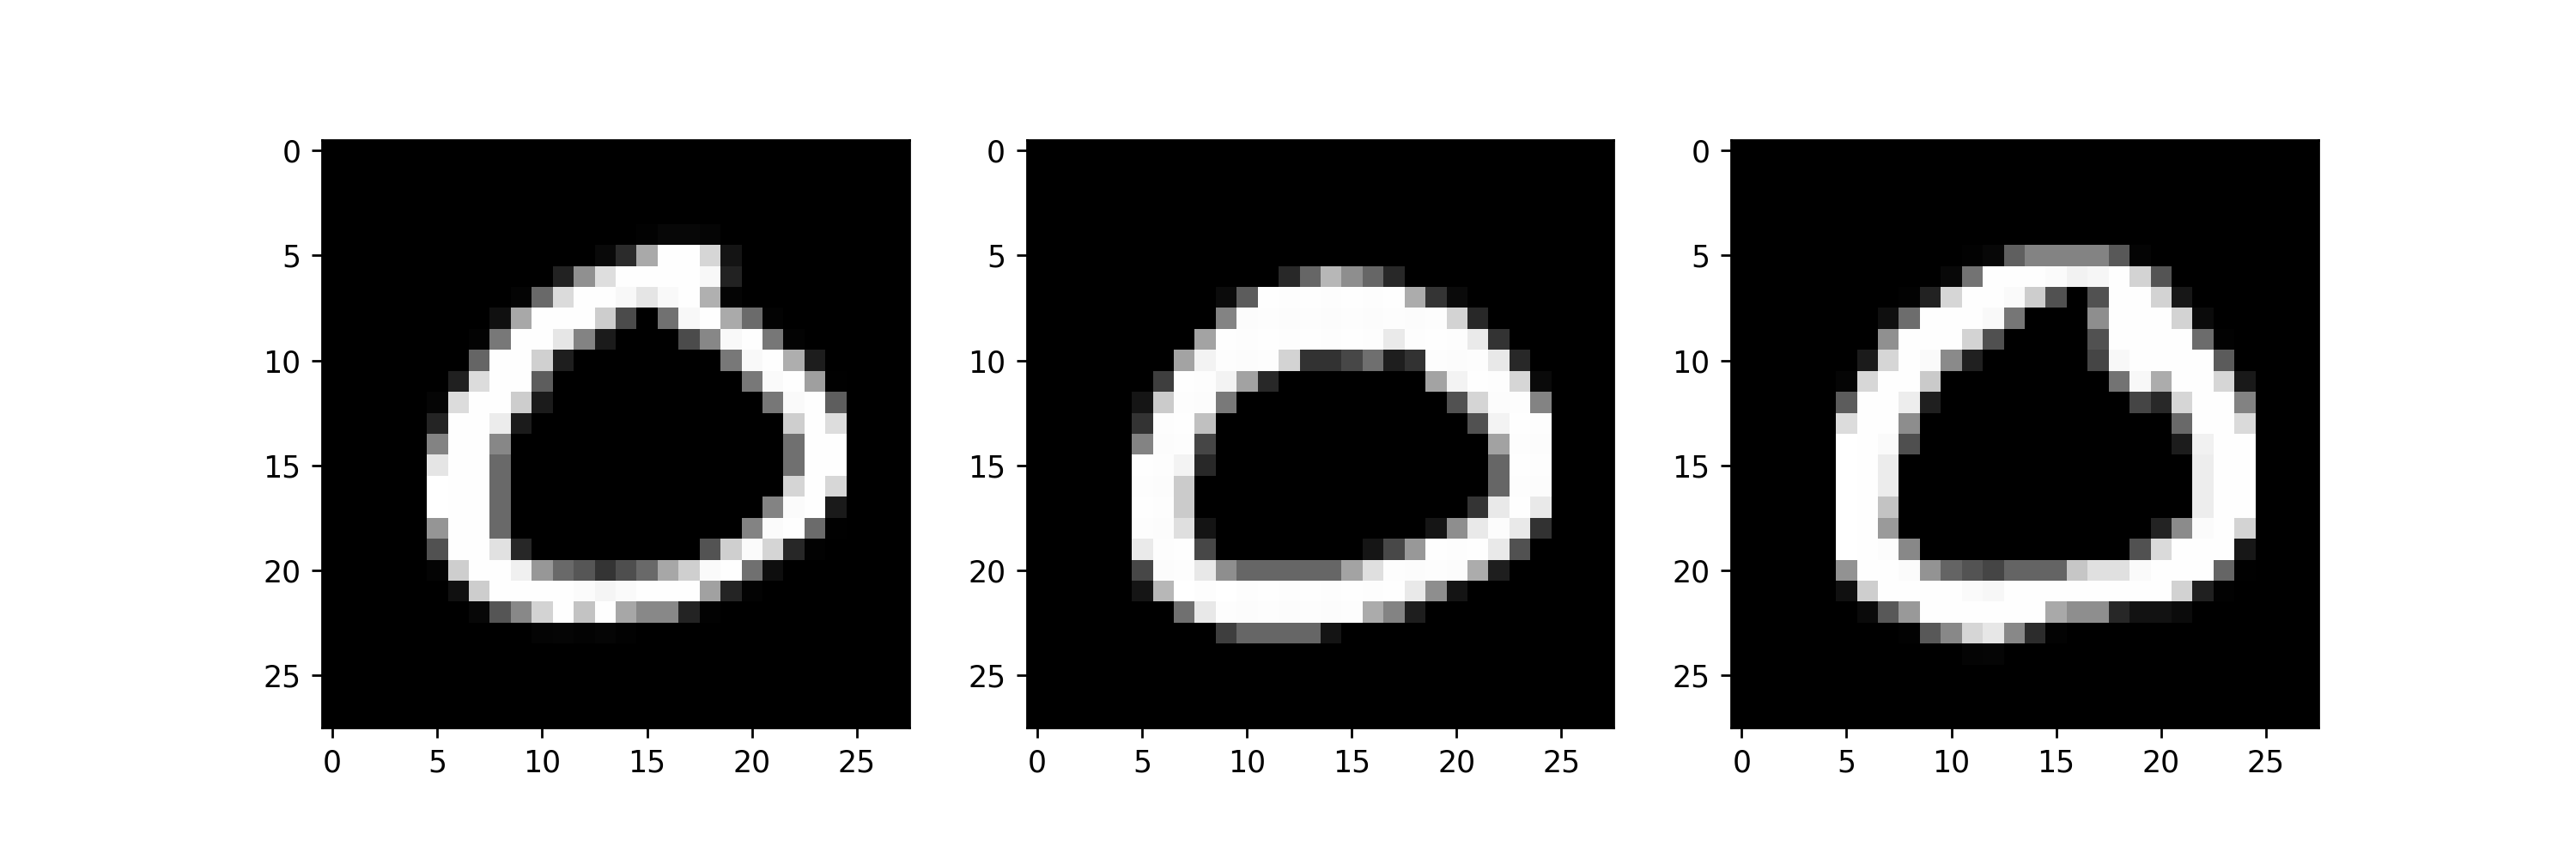

In [128]:
mnist_neigh = KNeighborsClassifier(n_neighbors = 1)
mnist_neigh.fit(X_train, y_train)
accuracy_score(mnist_neigh.predict(X_test),y_test)

neigborhoods = mnist_neigh.kneighbors(X_train, 3, False)



for i in range(9):
    show_sample(X_train[neigborhoods[i][0]], X_train[neigborhoods[i][1]], X_train[neigborhoods[i][2]])

Experiment with different parameters. What distance measure would you choose for this dataset? What other parameters could you adapt? What accuracy can you obtain?

In [108]:

from sklearn.metrics import classification_report, confusion_matrix


for n in ["euclidean",'manhattan','chebyshev']:
    # setting up the classifiar and fitting the data
    classifiar = KNeighborsClassifier(n_neighbors = 5,metric=n)
    classifiar.fit(X_train,y_train)
    Y_pred = classifiar.predict(X_test)
    print(f"\t\tClassification report where distance is {n}\n", classification_report(y_test,Y_pred))
    

		Classification report where distance is euclidean
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        88
           1       0.85      0.99      0.92       109
           2       0.98      0.90      0.94       102
           3       0.91      0.97      0.94       102
           4       0.95      0.89      0.92       108
           5       0.96      0.89      0.92        89
           6       0.97      0.95      0.96       121
           7       0.92      0.96      0.94        98
           8       0.97      0.86      0.92        88
           9       0.91      0.93      0.92        95

    accuracy                           0.94      1000
   macro avg       0.94      0.93      0.93      1000
weighted avg       0.94      0.94      0.93      1000

		Classification report where distance is manhattan
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        88
           1       0.82   

## Assignment 3: Self-Organizing Maps Theory [4 Points]

This exercise will highlight the theoretical differences of Self-Organizing Maps (SOMs) to other algorithms we already took a look at. There is again some research involved if the answers are not directly clear from the slides (or even better: your own ideas!)

### a) Learning in SOMs

How is learning in such a network achieved? Contrast this with techniques used in training a MLP.

Self organizing maps learn (similar to MLPs) by updating their neurons. However while MLPs learn by updating the weights based on the prediction and the wanted target SOM work more similar to k-means as that the neurons indicate the target and not the other way around. Therefore they learn by their similarity measure on the specific data representation and their inputs thus SOM takes the position of the neurons into account while MLP do not. Additionally only the weights for the winnning are updated while the remaining neurons are only updated in regrads of the "neurons that fire together wire together" concept (only with respect to the winning neuron and not the input itself).

### b) Initialization

Usually weights in a SOM are initialized randomly - what would be an alternative?

Initialize more neurons where datapoints are more dense.

<a id="ex1c"></a>
### c) Decaying learning rate

When training a self organizing map (and also other complex models), it is recommended to use a decaying learning rate. Explain, how this affects the learning process and why it may be beneficial.

The following function is often used for this purpose (where $s$ is the current training step and $S$ is the total number of steps to run):

$$\alpha(s, S) = 0.1 \exp\left(-\frac{s}{S-s}\right)$$

Plot its graph and discuss its properties.

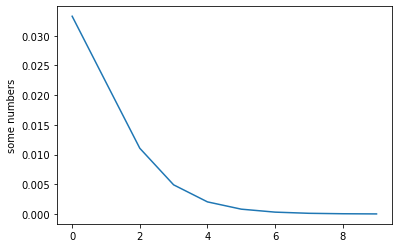

In [99]:
import numpy as np
values = []
for i in [1,2,3,4,5,6,7,8,9,10]:
    values.append(i*0.1*np.exp(-i/10-i))
    
plt.plot(values)
plt.ylabel('some numbers')
plt.show()

<a id="ex1d"></a>
### d) Decaying neighborhood function

SOM use a decaying neighborhood function. Explain its role in the training process.

One possible formula for for such a function is the following: let $u$ denote the coordinates of the best matching node, and $v$ the coordinates of some arbitrary node, $n$ the maximum number of nodes in one direction, and let a $s$ and $S$ again be the current step and the total number of steps, respectively: 

\begin{align*}
  r &= n \exp\left( -\frac{s \log(n)}{S} \right) \\
  \theta(u, v, s, S) &= \exp\left(-\frac{||u - v||^2}{2r^2}\right)
\end{align*}

Plot its 3D graph for a fixed node $u$ and describe its properties.

The decaying learning rate ensures that later changes are not that influential on the updating process having the idea that earlier modification helps the neuron to reach the classification cluster while later modification are more so fine tuning.

<IPython.core.display.Javascript object>


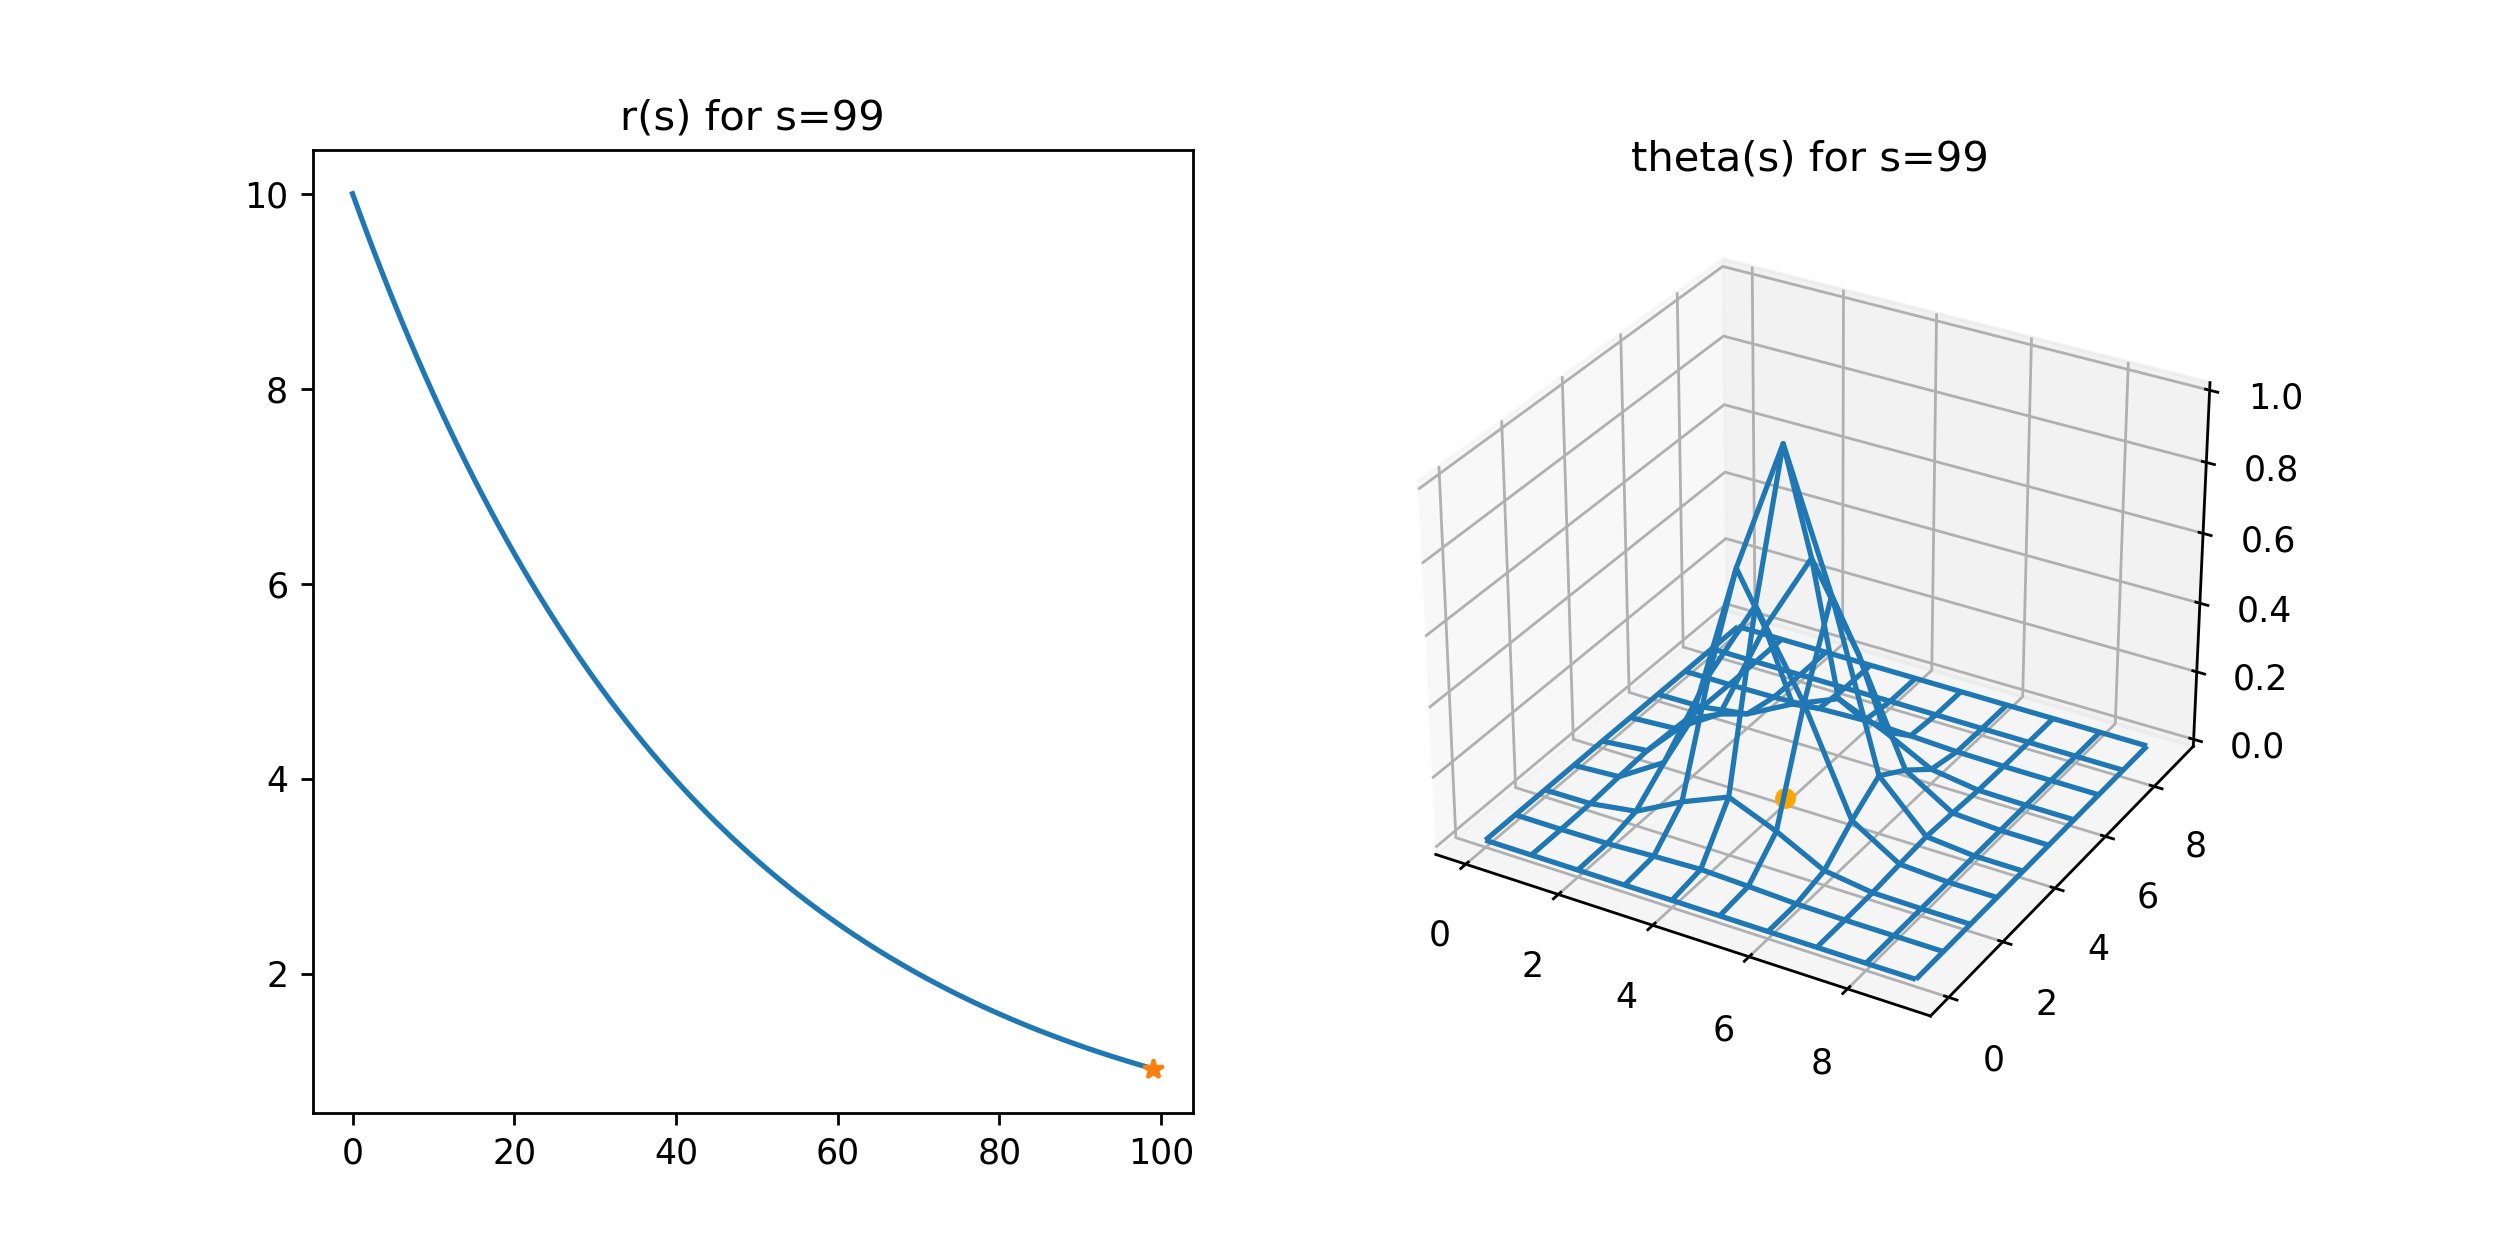

In [106]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

# The reference point u
u = (4, 4)

# The total number of steps
S = 100

# The size of the map (n*n)
n = 10

# the r function
r = lambda n, s, S: n * np.exp(-s * np.log(n) / S)

# the theta function
theta = lambda u, v, s, S: np.exp(-((u - v)**2).sum(axis=2) / (2 * r(n, s, S)**2))

v = np.indices((n, n)).transpose((1, 2, 0))
s_range = np.arange(S)

fig = plt.figure("The theta(u,v,s,S)", figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

for s in s_range:
    ax1.cla()
    ax1.set_title("r(s) for s={}".format(s))
    ax1.plot(s_range, r(n, s_range, S), '-')
    ax1.plot(s, r(n, s, S), '*')

    ax2.cla()
    ax2.set_title("theta(s) for s={}".format(s))
    ax2.set_zlim3d(0, 1)
    ax2.plot([u[0]], [u[1]], zs=[0], marker='o', color='orange', markersize=5)
    ax2.plot_wireframe(v[:, :, 0], v[:, :, 1], theta(u, v, s, S))

    fig.canvas.draw()

## Assignment 4: Self-Organizing Maps [6 Points]

In this exercise you will implement a self-organizing map and use it for a beautiful application: Coloring countries with similar statistics in similar colors. 

### Additional Information about the Data

The data is taken from the [World Bank's World DataBank](http://databank.worldbank.org/data/home.aspx) and preprocessed. Since their data is very sparse we just tried to use the latest possible data for each country in each category. This means there can be data from the 1960 but also from 2015 - for the exercise this shouldn't matter too much. Note that some countries don't have data at all.

The [blank map](https://en.wikipedia.org/wiki/File:BlankMap-World6-Equirectangular.svg) is taken from wikipedia. It is an [SVG](https://en.wikipedia.org/wiki/Scalable_Vector_Graphics) file which suits this task well: We can easily display it in Jupyter Notebooks and it is very easy to color them, as this just involves a modification of their style sheet. You can find the code to do this below, you just have to figure out how to use it.

### Coloring the Map

The following cell defines a method to create a colored version of the empty map and shows an example usage of it.

As you can see, the mapping parameter is a dictionary mapping lowercase [ISO 3166-2](https://en.wikipedia.org/wiki/ISO_3166-2) country codes to `[R, G, B]` values which range from `0` to `1`.

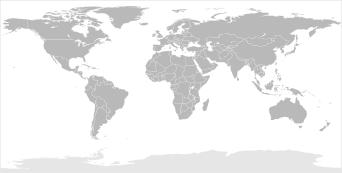

In [101]:
from IPython.display import SVG, display_svg
from xml.etree import cElementTree as ET
import time

def create_colored_map(color_mapping, scaling=0.7, display=True):
    """
    Takes a color mapping to create a world map with the specified 
    colors.
    For example:
    
    mapping = {'de': [1, 0, 0],
               'fr': [0, 1, 0]}
    create_and_display_colored_map(mapping)
    
    will create a worldmap and display it with Germany ('de') 
    colored red and France ('fr') colored green.
    Colors need to be iterables containing R G B values ranging
    from 0 (dark) to 1 (bright).
    
    The template used for the map can be found here:
    https://en.wikipedia.org/wiki/File:BlankMap-World6-Equirectangular.svg
    
    Args:
        mapping     A color mapping between country codes and colors.
        scaling     Scales the map by this factor. 
        display     If True, the image is displayed, if False, it is
                    returned.
    Returns:
        The svg image if display=False. Else nothing.
    """
    def color_css(color_mapping, map_id):
        """Creates a CSS string for the color mapping."""
        tmpl = '#{4} .{0} {{fill: #{1:0>2x}{2:0>2x}{3:0>2x} !important;}}'
        scale = lambda x : [int(255 * i) for i in x]
        return '\n' + '\n'.join([tmpl.format(country.lower(), *scale(color), map_id) for country, color in color_mapping.items()])

    # Read SVG file and get document root.
    tree = ET.parse('map.svg')
    root = tree.getroot()
    
    # Adjust the ID (Otherwise coloring will be global for all SVG images).
    time.sleep(1)
    root.attrib['id'] = "{}{}".format(root.attrib['id'], str(time.time())[0:10])
    
    # Search the style element and append the color mapping.
    style_element = tree.find('{http://www.w3.org/2000/svg}style')
    style_element.text = style_element.text + color_css(color_mapping, root.attrib['id'])

    # Adjust the image scale.
    root.attrib['height'] = str(float(root.attrib['height']) * scaling)
    root.attrib['width'] = str(float(root.attrib['width']) * scaling)
    
    # Create an SVG instance which can be displayed by Jupyter.
    svg = SVG(data=ET.tostring(root).decode('UTF-8').replace('ns0:',''))
    if display:
        display_svg(svg)
    else:
        return svg

# Example for coloring the map.
mapping = {'de': [1, 0, 0], 
           'fr': [0, 1, 0], 
           'us': [0, 0, 1]}
create_colored_map(mapping, scaling=0.4)

### a) Implement a Self-Organizing Map.

Below is a class definition for a self-organizing map. The initialization is already provided. Follow the instruction below to finish it.

1. Write a method `get_best_matching_index(self, X)` which returns the indices of the node with the weights closest to `X`. Use the `cdist` function to calculate the distances between `X` and all nodes. *Note:* You might need `unravel_index`.

1. Write a method `alpha(self, step, max_steps)` which defines the decaying learning rate. Use the formula from [exercise 1c)](#ex1c), i.e.
$$\alpha(s, S) = 0.1 \exp\left(-\frac{s}{S-s}\right)$$

1. Write a method `theta(self, u, v, step, max_steps)` which defines the decaying neighborhood function. Use the formula from [exercise 1d)](#ex1d), i.e,
$$\theta(u, v, s, S) = \exp\left(-\frac{||u - v||^2}{2r^2}\right)\qquad\text{with }
  r = n \exp\left( -\frac{s \log(n)}{S} \right) $$

1. Write a function `organize(self, max_steps)` which trains the map for `max_steps` steps. Pick a random data sample $X$, calculate the best matching indices $u$ and update each node $v_i$ (with $w_{v_i}$ being the corresponding weight vector) according to the following formula ($s$, $S$, $\theta$ and $\alpha$ are as above): 
$$\Delta w_{v_i} = \theta(u, v_i, s, S)\ (X - w_{v_i})\ \alpha(s, S)$$

In [105]:
%matplotlib inline
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import matplotlib.colors as colors


class SelfOrganizingMap:
    """Implements a self-organizing map."""

    def __init__(self, data, map_size=(20, 20), method='distance'):
        """
        Creates a grid self.nodes of map_size[0] x map_size[1] 
        many nodes with random weights for each dimension in the 
        data. This means self.nodes.shape will be 
        (map_size[0], map_size[1], data.shape[-1]).
        
        Stores the data in self.data.
        
        Args:
            data        The data to fit with this map.
            map_size    The size of the map. Defaults to 20x20.
            method      The activation method. Supports 'distance' and 'activation'.
        """
        self.nodes = np.random.rand(map_size[0], map_size[1], data.shape[-1])
        self.data = data
        self.method = method

#     def theta(self, u, v, step, max_steps):
#         """
#         The neighborhood function. 
        
#         Args:
#             u           The best matching node's grid coordinates.
#             v           Grid coordinates of the (possible) neighboring node.
#             step        The current step.
#             max_steps   The maximum number of steps.
        
#         Returns:
#             A weight of how strong the neighborhood relation between
#             u and v is at step of max_steps.
#         """
    theta = lambda u, v, s, S: np.exp(-((u - v)**2).sum(axis=2) / (2 * r(n, s, S)**2))


    def alpha(self, step, max_steps):
        """
        The learning rate. Decays with step.
        
        Args:
            step        The current step.
            max_steps   The maximum number of steps.
        """
        alpha = 0.1 * np.exp(- step / (max_steps - step))

    def organize(self, max_steps):
        """
        For steps this method organizes the map with its data.
        
        In each step it picks a random sample from the data and
        calculates the best matching node.
        The best matching node's indices are calculated with 
        get_best_matching_index.
        Using the indices of that node, all nodes are
        updated by applying alpha and theta.
        
        Args:
            max_steps   The number of steps.
        """
        # YOUR CODE HERE

    def get_best_matching_index(self, X):
        """
        Calculates the best matching node for data sample X.
        Depending on the method used (see __init__), a different
        approach is used.
        
        method 'distance': 
            Finds the best matching node by minimal distance:
                argmin(||n-x||)
        other method ('activation'): 
            Finds the best matching node by maximal excitation:
                argmax(nx)
        
        Args:
            X       The data point.
        Returns:
            The grid coordinates of the best matching node.
        """
        if method == 'distance':
            return np.argmin(cdist(X,nodes))
        elif method == 'activation':
            return np.argmin(cdist(X,nodes))
            

    def __getitem__(self, key):
        """
        Allows to access the nodes via the self-organizing map directly.
        
        som[4,2] 
        is thus same as 
        som.nodes[4,2]
        
        Args:
            key The key (can be a slice or similar).
        Returns:
            self.nodes[key]
        """
        return self.nodes[key]

    def plot(self):
        """Plots the map's first three features as an image."""
        _nodes = self.nodes[:, :, 0:3].copy()
        _nodes -= _nodes.min()
        _nodes /= _nodes.max()
        
        plt.imshow(_nodes, interpolation='none')

In [103]:
np.argmax([1,20,3,4,5,7])

1

### b) Apply the Self-Organizing Map

Now apply your self-organizing map on some data.

We already generate simple color data for you - you can change it if you like.

1. Load `world_data.csv`. We recommend using a `csv.reader` for this, as the first column contains strings: the labels you need to use to accomplish the mapping.

1. The data has some invalid values (np.nan). Use the `SimpleImputer` (check the imports) to fill them.

1. Additionally the data has to be scaled. Use `scale` (check the imports) for this.

1. Create two instances of the `SelfOrganizingMap` and organize them, one for the colors and one for the countries. Take care that both have the same sizes.

In [ ]:
%matplotlib inline
import csv
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.impute import SimpleImputer

# Generate color data.
colors = np.array(list(itertools.product([0, 1], repeat=3)))

# TODO: Read world data.
# YOUR CODE HERE

# TODO: Create color map and organize it.
# some_colors = ...
# YOUR CODE HERE

# TODO: Create country map and organize it.
# som_countries = ...
# YOUR CODE HERE

# Take a look at the results.
plt.figure('SOM')
plt.subplot(221).set_title('Colors by Distance')
som_colors.plot()
plt.subplot(222).set_title('Countries by Distance')
som_countries.plot()
plt.subplot(223).set_title('Colors by Activation')
som_colors_act.plot()
plt.subplot(224).set_title('Countries by Activation')
som_countries_act.plot()

Select the best matching indices for each country from the country map. Use those indices to select the corresponding color from the color map. Create the mapping from ISO codes to colors and use the `create_colored_map` function to produce the colored SVG map.

In [ ]:
# TODO: Match countries to colors.
# YOUR CODE HERE

# TODO: Create colored map.
# YOUR CODE HERE